In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# getting the shapes
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)
print("Shape of Submission :", submission.shape)

Shape of Train : (341424, 24)
Shape of Test : (146765, 23)
Shape of Submission : (146765, 2)


In [81]:
# saving the targets and id

reservation_id = test['reservation_id']
y_train = train['amount_spent_per_room_night_scaled']

In [82]:
# deleting the target variable from the train data

train = train.drop(['amount_spent_per_room_night_scaled'], axis = 1)

# checking the shape of train
train.shape

(341424, 23)

In [83]:
# combining the train and test sets

data = pd.concat([train, test], axis = 0)

# getting the shape
data.shape

(488189, 23)

In [6]:
# describing the train data

data.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code
count,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488189.000000,488040.000000,481165.000000,488189.000000,488189.000000,488189.000000
mean,1.902587,2.207459,3.275522,0.362573,209.955489,1.773303,2.194687,2.889850,3.735949,2.676035,7.258755,4.759472,3.191893,1.123952
std,0.915112,0.821989,1.764458,0.758078,864.891408,0.751550,1.549417,0.804194,2.480057,0.884669,4.717773,3.103048,1.166638,0.329527
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,80.000000,4.000000,38.000000,13.000000,24.000000,2.000000


In [7]:
# imputing missing values

data['season_holidayed_code'].fillna(data['season_holidayed_code'].mode()[0], inplace = True)
data['state_code_residence'].fillna(data['state_code_residence'].mode()[0], inplace = True)

# checking if any NULL value is left
data.isnull().sum().sum()

0

In [8]:
# deleting some of the useless columns

data = data.drop(['reservation_id', 'memberid', 'resort_id'], axis = 1)

# checking the new shape
data.shape

(488189, 20)

In [9]:
# checking the new columns

data.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'numberofchildren',
       'persontravellingid', 'resort_region_code', 'resort_type_code',
       'room_type_booked_code', 'roomnights', 'season_holidayed_code',
       'state_code_residence', 'state_code_resort', 'total_pax',
       'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code'],
      dtype='object')

In [10]:
# converting dates into datetime format

data['booking_date'] = pd.to_datetime(data['booking_date'], errors = 'coerce')
data['checkin_date'] = pd.to_datetime(data['checkin_date'], errors = 'coerce')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], errors = 'coerce')

# extracting out years, months, days and weeks from the date

data['booking_year'] = data['booking_date'].dt.year
data['booking_month'] = data['booking_date'].dt.month

data['checkin_year'] = data['checkin_date'].dt.year
data['checkin_month'] = data['checkin_date'].dt.month

data['checkout_year'] = data['checkout_date'].dt.year
data['checkout_month'] = data['checkout_date'].dt.month

In [11]:
# now dropping the dates column

data = data.drop(['booking_date', 'checkin_date', 'checkout_date'], axis = 1)

# checking the new columns after feature engineering

data.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'booking_year', 'booking_month',
       'checkin_year', 'checkin_month', 'checkout_year', 'checkout_month'],
      dtype='object')

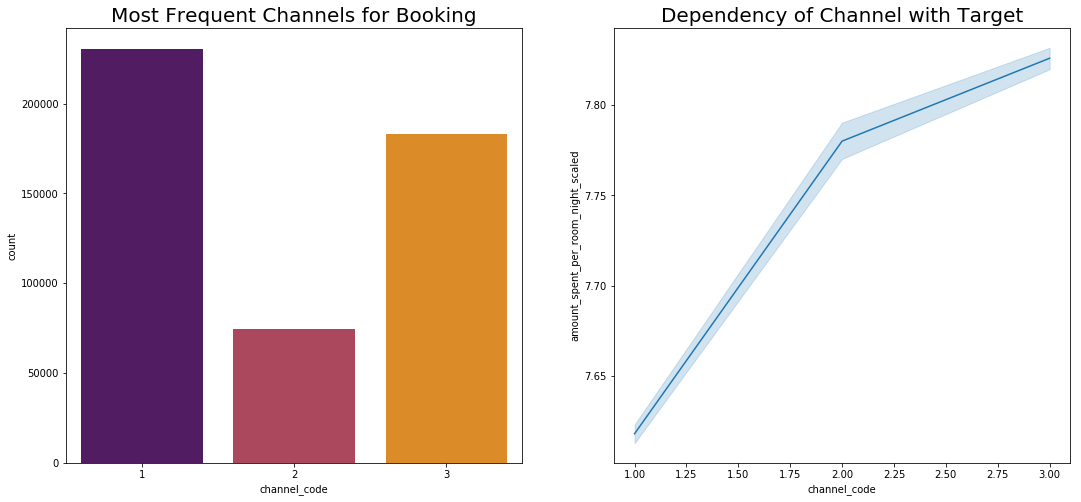

In [84]:
# analysis of channel code
# checking the count of channel code

plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['channel_code'], palette = 'inferno')
plt.title('Most Frequent Channels for Booking', fontsize = 20)

# checking dependency of channel code with target

plt.subplot(1, 2, 2)
sns.lineplot(train['channel_code'], y_train, palette = 'magma')
plt.title('Dependency of Channel with Target', fontsize = 20)

plt.show()

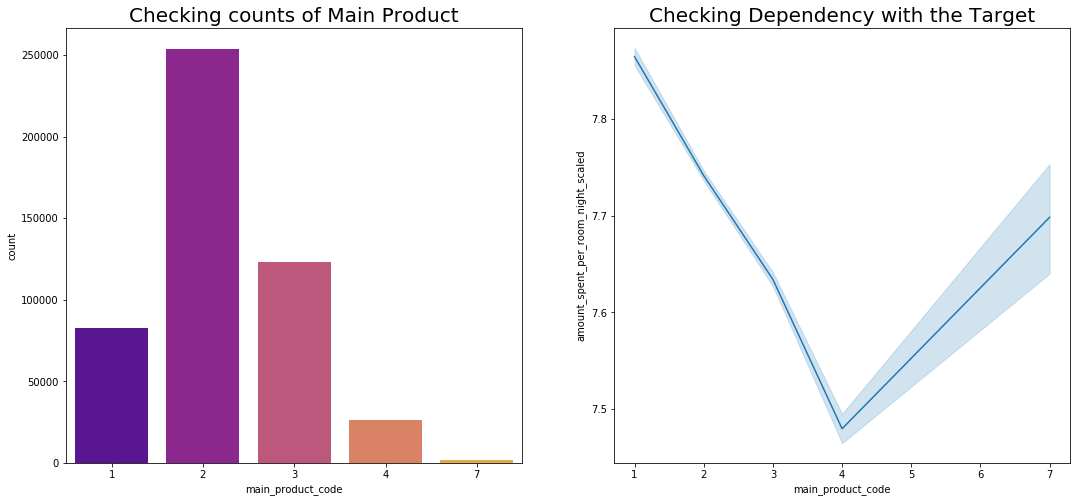

In [13]:
# analysis of main_product_code

# counting the values in main_product_code
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['main_product_code'], palette = 'plasma')
plt.title('Checking counts of Main Product', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['main_product_code'], y_train)#, palette = 'viridis')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [14]:
# applying mean ecoding following the graph
# main product code 1 and 2 have huge impact, 3, 6, 7 have good impact and 4, 5 have very less impact
# replacing 4, 5 with 1
# replacing 3, 6, 7 with 2, and
# replacing 1, 2 with 3

data['main_product_code'].replace((1, 2, 3, 4, 5, 6, 7), (3, 3, 2, 1, 1, 2, 2), inplace = True)

# checking the values
data['main_product_code'].value_counts()

3    336798
2    124803
1     26588
Name: main_product_code, dtype: int64

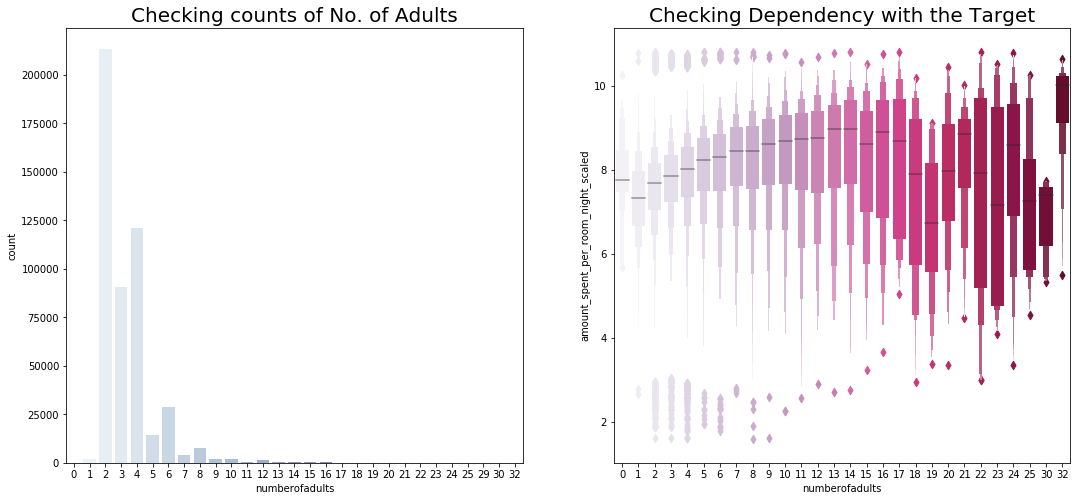

In [15]:
# analysis of no. of adults

# counting the values in no. of adults
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['numberofadults'], palette = 'BuPu')
plt.title('Checking counts of No. of Adults', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.boxenplot(train['numberofadults'], y_train, palette = 'PuRd')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [16]:
# as we can see that there is a pattern which says that the spending score increases for no. of adults 1 to 10, but it is very confusing for 10-30 and vey high for 32
# so we can make 3 groups no. of adults 1-10, 11-20, 21+

def groups(numberofadults):
  if numberofadults <= 10:
    return 1
  if numberofadults <= 20 and numberofadults > 10:
    return 2
  else:
    return 3


data['numberofadults'] = data.apply(lambda x: groups(x['numberofadults']), axis = 1)
data['numberofadults'].value_counts()

1    484582
2      3372
3       235
Name: numberofadults, dtype: int64

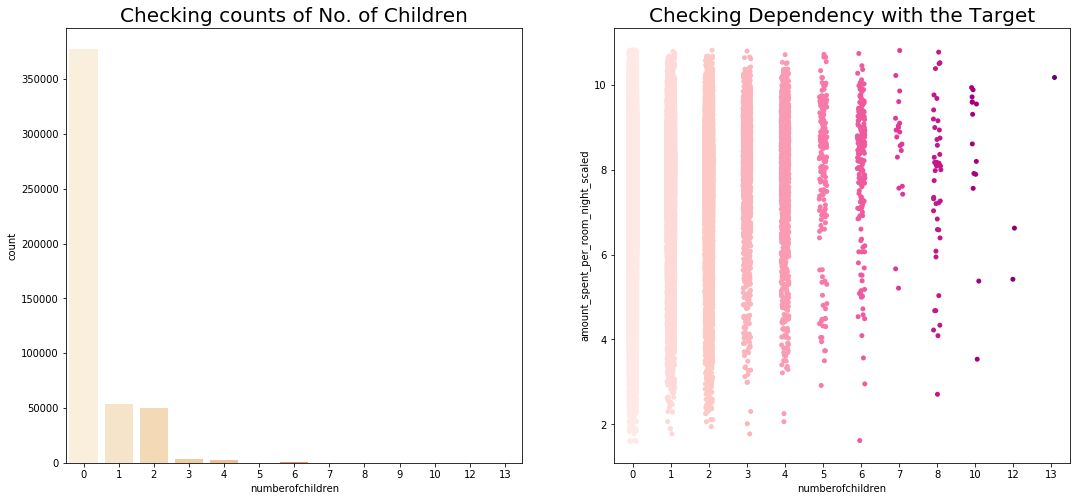

In [17]:
# analysis of numberofchildren

# counting the values in no. of children
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['numberofchildren'], palette = 'OrRd')
plt.title('Checking counts of No. of Children', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.stripplot(train['numberofchildren'], y_train, palette = 'RdPu')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [18]:
# as we can see that there is a pattern which says that the spending score increases for no. of children 1 to 10, but it is very confusing for 10-30 and vey high for 32
# so we can make 3 groups no. of adults 1-10, 11-20, 21+

def groups(numberofchildren):
  if numberofchildren <= 4:
    return 1
  if numberofchildren <= 8 and numberofchildren > 4:
    return 2
  else:
    return 3


data['numberofchildren'] = data.apply(lambda x: groups(x['numberofchildren']), axis = 1)
data['numberofchildren'].value_counts()

1    487539
2       624
3        26
Name: numberofchildren, dtype: int64

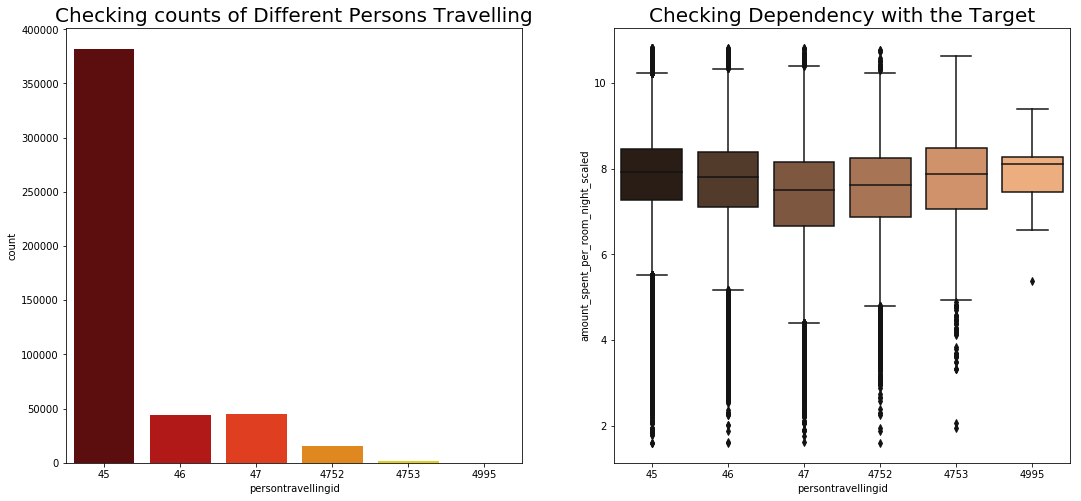

In [19]:
# analysis of persontravellingid
# it states the different types of persons travelling

# counting the values in persontravellingid
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['persontravellingid'], palette = 'hot')
plt.title('Checking counts of Different Persons Travelling', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.boxplot(train['persontravellingid'], y_train, palette = 'copper')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [20]:
# as from the above graph it is clearly visible that all the six type of person travelling have equal weightage we must one-hot encode them

columns = ["persontravellingid"]
data = pd.get_dummies(data, columns = columns)

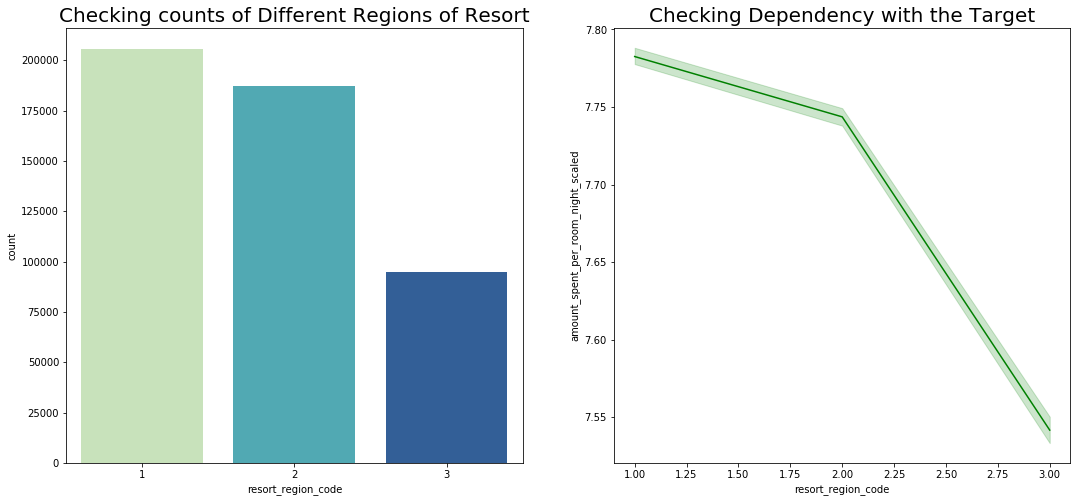

In [21]:
# analysis of resort region code

# counting the values in resort region code
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['resort_region_code'], palette = 'YlGnBu')
plt.title('Checking counts of Different Regions of Resort', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['resort_region_code'], y_train, color = 'green')#, palette = 'cool')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [22]:
# as from the above graph it is clearly visible that region 1 has huge impact, region 2 has good impact and region 3 has low impact onn amount spent 
# so let's do target encoding

data["resort_region_code"].replace((1, 2, 3), (3, 2, 1), inplace = True)

# checking the values 
data['resort_region_code'].value_counts()

3    205751
2    187358
1     95080
Name: resort_region_code, dtype: int64

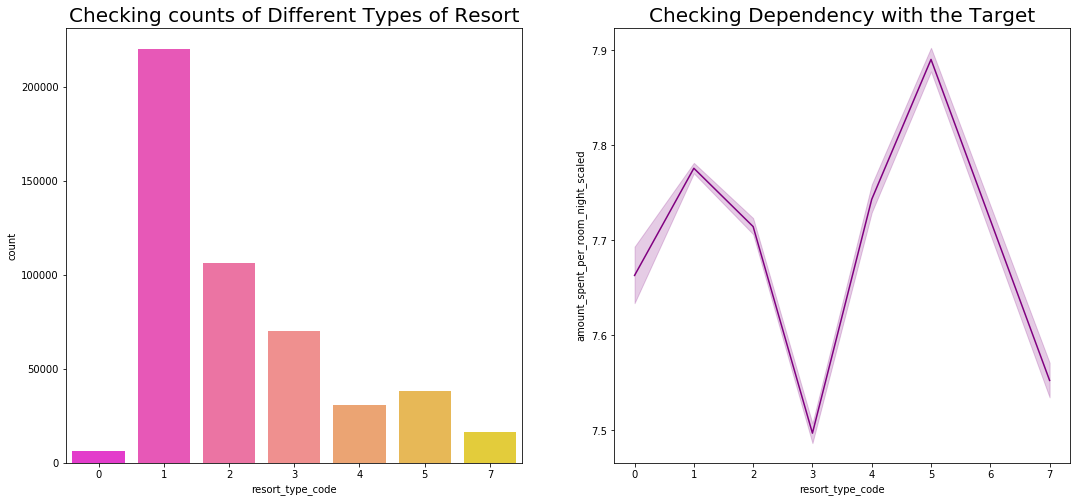

In [23]:
# analysis of resort type code

# counting the values in resort region code
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['resort_type_code'], palette = 'spring')
plt.title('Checking counts of Different Types of Resort', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['resort_type_code'], y_train, color = 'purple')#, palette = 'autumn')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [24]:
# as from the above graph it is clearly visible that all the seven types of resort different weightage
# so let's do target encoding resort type 1, 5 have huge impact, resort no. 4, 2, 5 have good impact and resort type 7 and 3 have poor impact
# encoding 5 and 1 as 3
# encoding 4, 2, 6 as 2
# encoding 7 and 3 as 1

data["resort_type_code"].replace((0, 1, 2, 3, 4, 5, 6, 7), (2, 3, 2, 1, 2, 3, 2, 1), inplace = True)

# checking the values
data['resort_type_code'].value_counts()

3    258408
2    143363
1     86418
Name: resort_type_code, dtype: int64

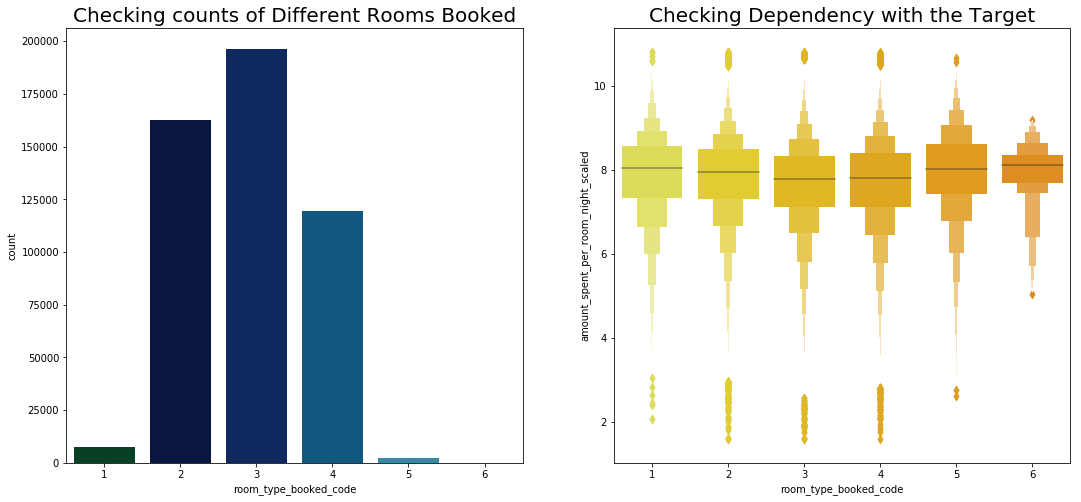

In [25]:
# analysis of room type booked

# counting the values in resort room type
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['room_type_booked_code'], palette = 'ocean')
plt.title('Checking counts of Different Rooms Booked', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.boxenplot(train['room_type_booked_code'], y_train, palette = 'Wistia')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [26]:
# as from the above graph it is clearly visible that all the six types of rooms have equal weightage we must one-hot encode them

columns = ["room_type_booked_code"]
data = pd.get_dummies(data, columns = columns)

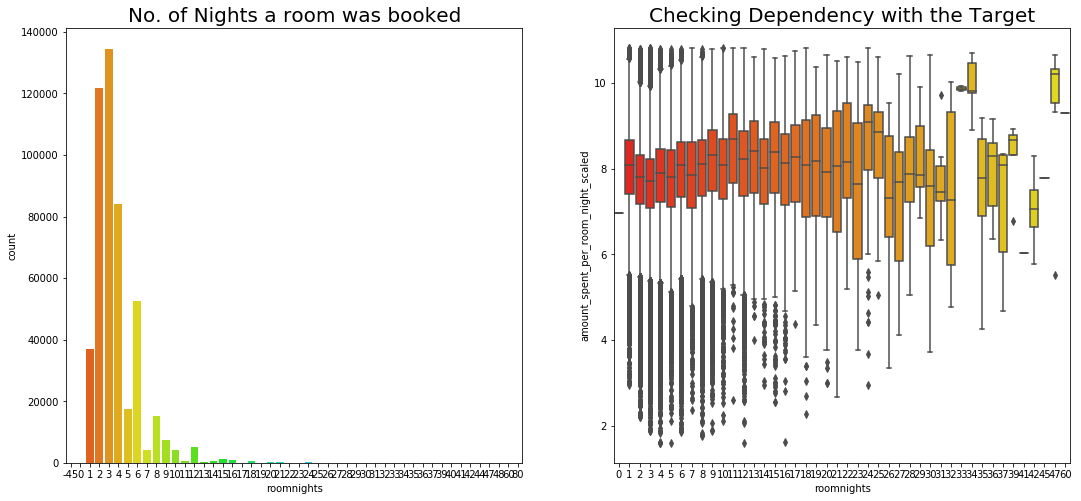

In [27]:
# analysis of room nights
# it means the no. of room nights booked

# there is a value of -45 so, we are converting it to 45
train['roomnights'].replace(-45, 45, inplace = True)

# counting the values in resort room nights
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['roomnights'], palette = 'hsv')
plt.title('No. of Nights a room was booked', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.boxplot(train['roomnights'], y_train, palette = 'autumn')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [28]:
# as we can see that there is a pattern which says that the spending score increases for no. of rooms 1 to 5, but it is very confusing for 10-30 and vey high for 32
# so we can make 3 groups no. of adults 1-10, 11-20, 21+

def groups(roomnights):
  if roomnights <= 5:
    return 1
  if roomnights <= 20 and roomnights > 5:
    return 2
  if roomnights <= 30 and roomnights > 20:
    return 3
  if roomnights <= 40 and roomnights > 30:
    return 4
  else:
    return 5


data['roomnights'] = data.apply(lambda x: groups(x['roomnights']), axis = 1)
data['roomnights'].value_counts()

1    394772
2     92760
3       552
4        77
5        28
Name: roomnights, dtype: int64

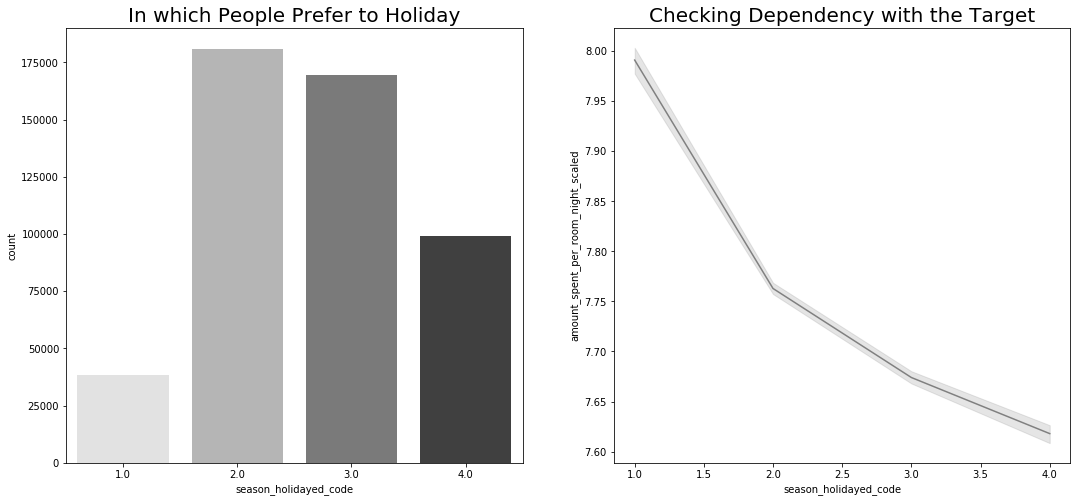

In [29]:
# analysis of season holidayed code
# it means in which season the people have holidayed

# counting the values in season holidayed code
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['season_holidayed_code'], palette = 'Greys')
plt.title('In which People Prefer to Holiday', fontsize = 20)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['season_holidayed_code'], y_train, color = 'gray')#, palette = 'seismic')
plt.title('Checking Dependency with the Target', fontsize = 20)

plt.show()

In [30]:
# as from the above graph it is clearly visible that all the four  types of seasons have different impact on the amount spent
# let's target encode them 
# as season holiday code 1 has huge impact , encode it as 4
# as season holiday code 2 has huge impact , encode it as 3
# as season holiday code 3 has huge impact , encode it as 2
# as season holiday code 4 has huge impact , encode it as 1


data["season_holidayed_code"].replace((1, 2, 3, 4), (4, 3, 2, 1), inplace = True)

# checking the values
data['season_holidayed_code'].value_counts()

3.0    181013
2.0    169640
1.0     99276
4.0     38260
Name: season_holidayed_code, dtype: int64

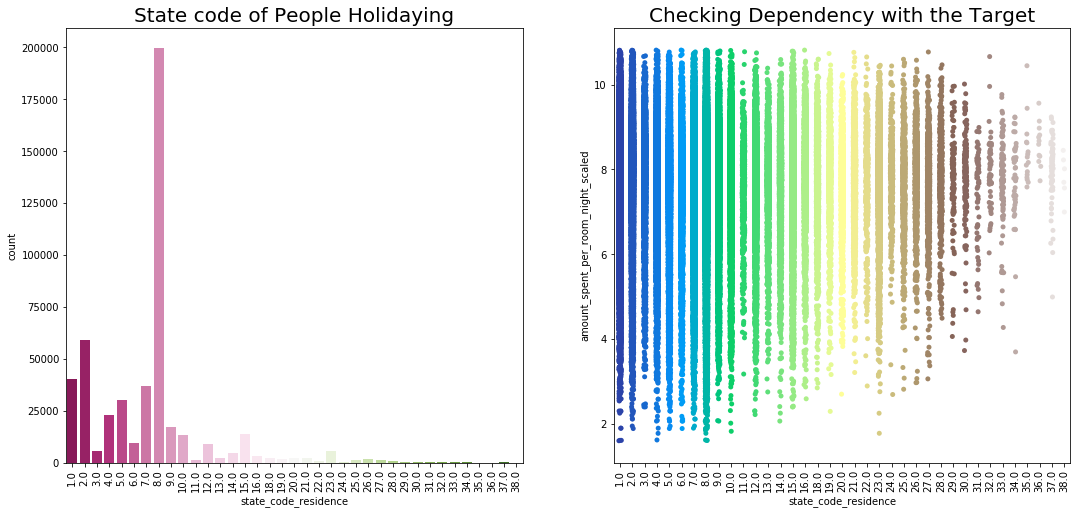

In [31]:
# analysis of state code residence
# it states the residence code of the members.

# counting the values in state code residence
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['state_code_residence'], palette = 'PiYG')
plt.title('State code of People Holidaying', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.stripplot(train['state_code_residence'], y_train, palette = 'terrain')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [32]:
data.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'resort_region_code', 'resort_type_code',
       'roomnights', 'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax', 'member_age_buckets',
       'booking_type_code', 'cluster_code', 'reservationstatusid_code',
       'booking_year', 'booking_month', 'checkin_year', 'checkin_month',
       'checkout_year', 'checkout_month', 'persontravellingid_45',
       'persontravellingid_46', 'persontravellingid_47',
       'persontravellingid_4752', 'persontravellingid_4753',
       'persontravellingid_4995', 'room_type_booked_code_1',
       'room_type_booked_code_2', 'room_type_booked_code_3',
       'room_type_booked_code_4', 'room_type_booked_code_5',
       'room_type_booked_code_6'],
      dtype='object')

In [33]:
# imputing the missing values in state code res.

train['state_code_residence'].fillna(train['state_code_residence'].mode()[0], inplace = True)

# checking the null values
train['state_code_residence'].isnull().any()

False

In [34]:
# creating a dataset

y = train['state_code_residence']
x = pd.concat([y_train, y], axis = 1).values

# checking the shape
x.shape

(341424, 2)

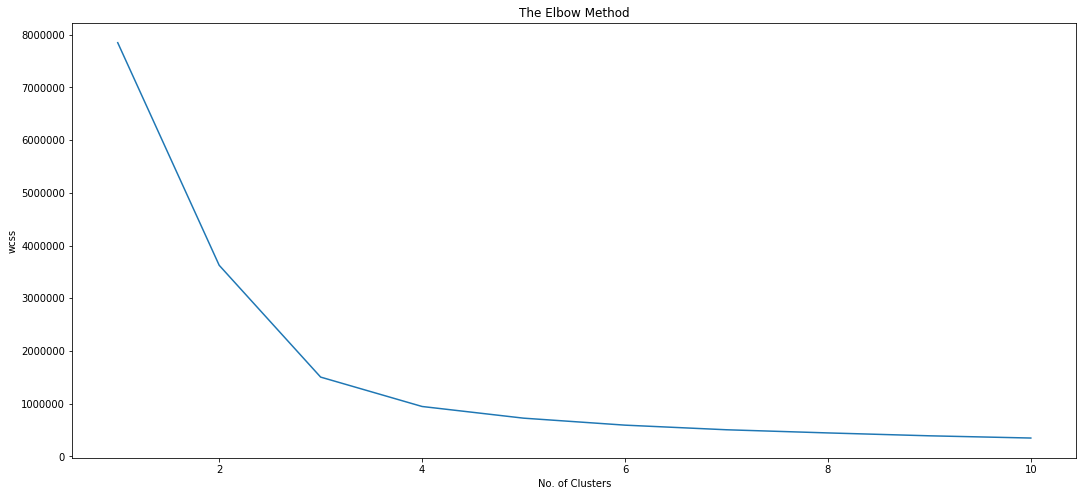

In [35]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', random_state = 0, max_iter = 300)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

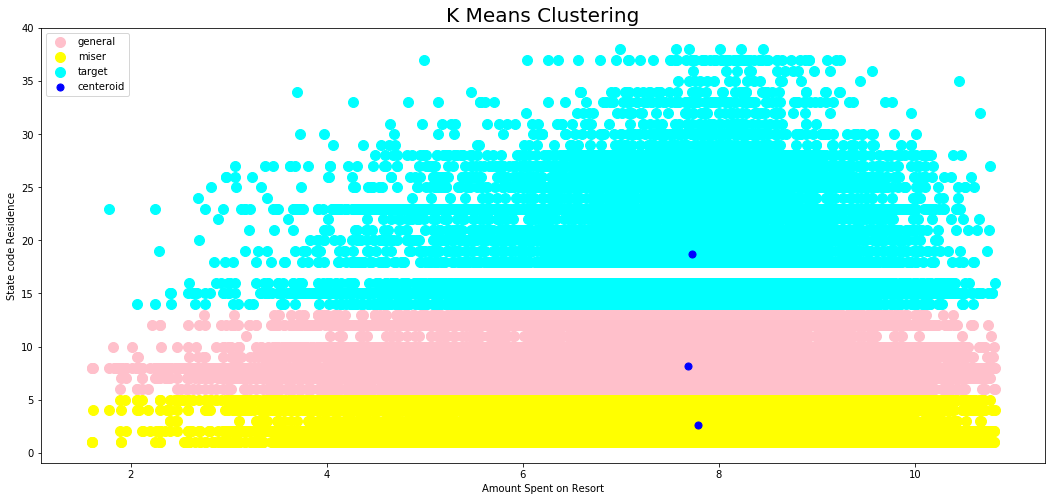

In [36]:
# making the clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Amount Spent on Resort')
plt.ylabel('State code Residence')
plt.legend()
plt.show()

In [37]:
# let's target encode state code residence according to the above clusters

def groups(state_code_residence):
    if state_code_residence <= 5:
        return 1
    if state_code_residence <= 15 and state_code_residence > 5:
        return 2
    else:
        return 3
  
data['state_code_residence'] = data.apply(lambda x: groups(x['state_code_residence']), axis = 1)

# checking the values
data['state_code_residence'].value_counts()

2    306597
1    157961
3     23631
Name: state_code_residence, dtype: int64

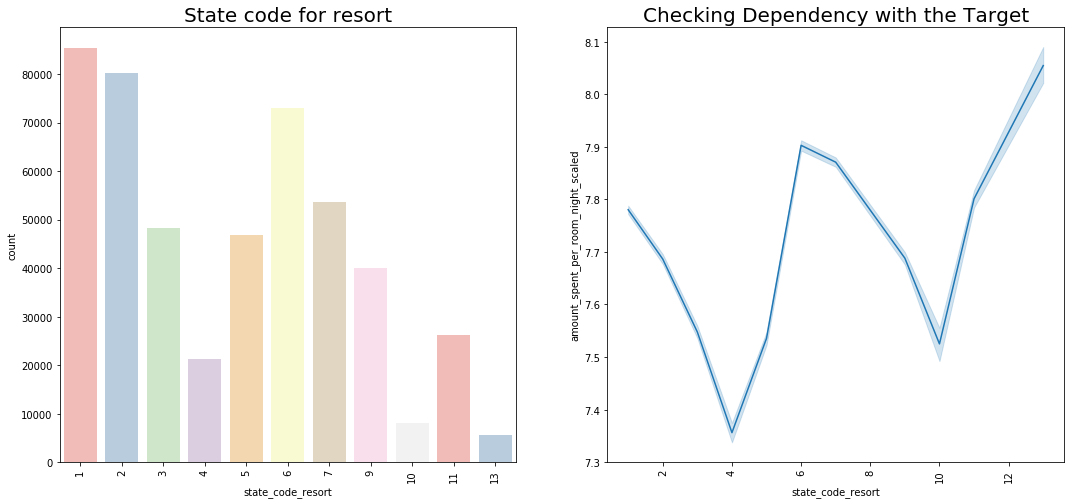

In [38]:
# analysis of state code resort
# it states the residence code of the members.

# counting the values in state code resort
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['state_code_resort'], palette = 'Pastel1')
plt.title('State code for resort', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['state_code_resort'], y_train)#, palette = 'Pastel2')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [39]:
# as from the above graph it is clearly visible that all the thirteen types of states of resorts have different weightage
# so we must target encode them according to the above graph
# let's encode state code resorts 13, 12, 6, 7, 1 as 3 as they have huge impact on amount spent
# let's encode state code resorts 11, 9, 2, 8 as 2 as they have good impact on amount spent
# let's encode state code resorts 5, 10, 3, 4 as 1 as they have poor impact on amount spent


data["state_code_resort"].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), (3, 2, 1, 1, 1, 3, 3, 2, 2, 1, 2, 3, 3), inplace = True)

# checking the values
data['state_code_resort'].value_counts()

3    217573
2    146305
1    124311
Name: state_code_resort, dtype: int64

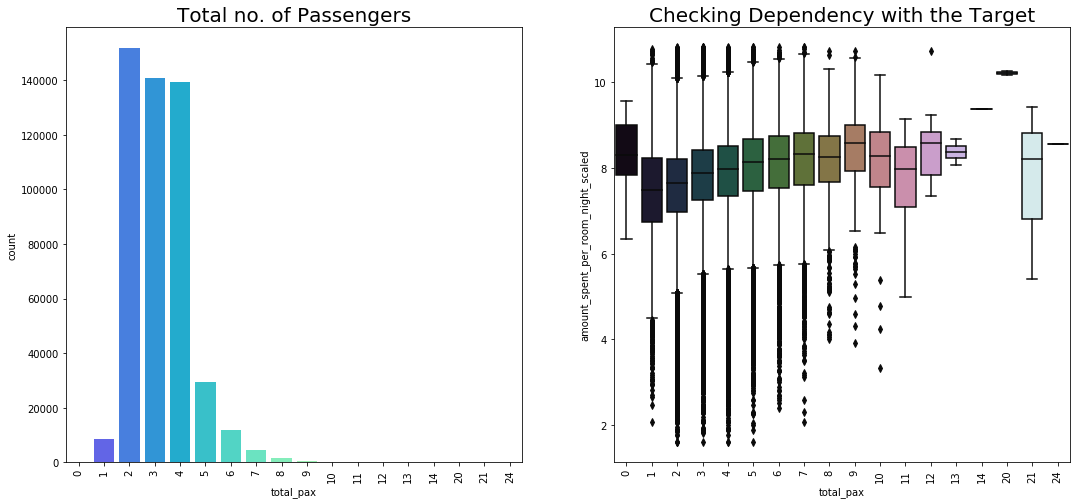

In [40]:
# analysis of total pax
# it states the total no. of persons travelling

# counting the values in no. of persons travelling
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['total_pax'], palette = 'rainbow')
plt.title('Total no. of Passengers', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.boxplot(train['total_pax'], y_train, palette = 'cubehelix')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [41]:
# as we can see that there is a pattern which says that the spending score increases for total no. of passengers, it increases upto 20 and then decreases.
# so we can make 3 groups no. of adults 1-10, 11-20, 21+

def groups(total_pax):
    if total_pax <= 5:
        return 1
    if total_pax <= 10 and total_pax > 5:
        return 2
    if total_pax <= 15 and total_pax > 10:
        return 3
    if total_pax <= 20 and total_pax > 15:
        return 4
    else:
        return 3


data['total_pax'] = data.apply(lambda x: groups(x['total_pax']), axis = 1)
data['total_pax'].value_counts()

1    469896
2     18240
3        51
4         2
Name: total_pax, dtype: int64

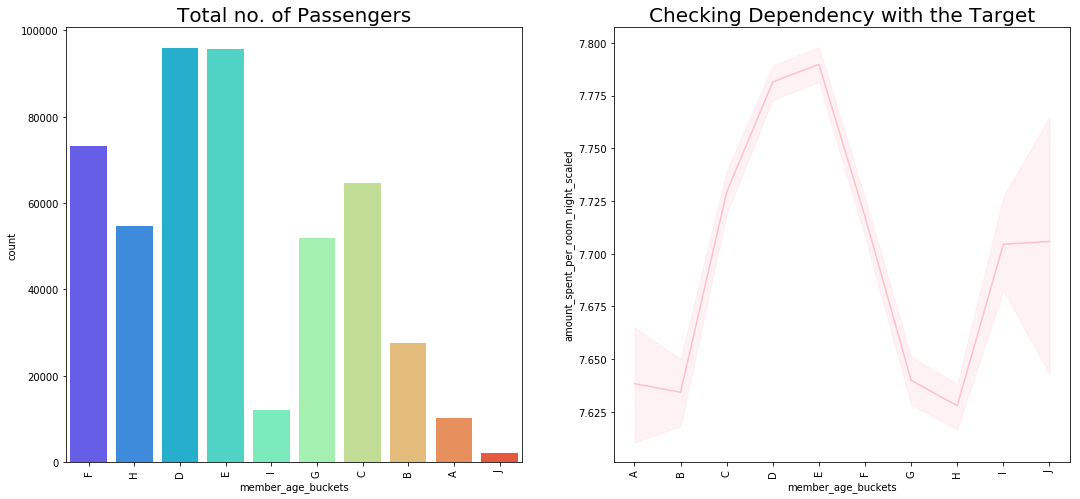

In [42]:
# analysis of member age buckets
# it states the age bucket of the members

# counting the values of age buckets of people travelling
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['member_age_buckets'], palette = 'rainbow')
plt.title('Total no. of Passengers', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['member_age_buckets'], y_train, color = 'pink')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [43]:
# label encoding of the member age buckets
# lets label A, B, G, H as 1 I, J as 2 and C, D, E, F as 3

data['member_age_buckets'].replace(('A', 'B', 'G', 'H'), (1, 1, 1, 1), inplace = True)
data['member_age_buckets'].replace(('I', 'J'), (2, 2), inplace = True)
data['member_age_buckets'].replace(('C', 'D', 'E', 'F'), (3, 3, 3, 3), inplace = True)

data['member_age_buckets'].value_counts()

3    329567
1    144540
2     14082
Name: member_age_buckets, dtype: int64

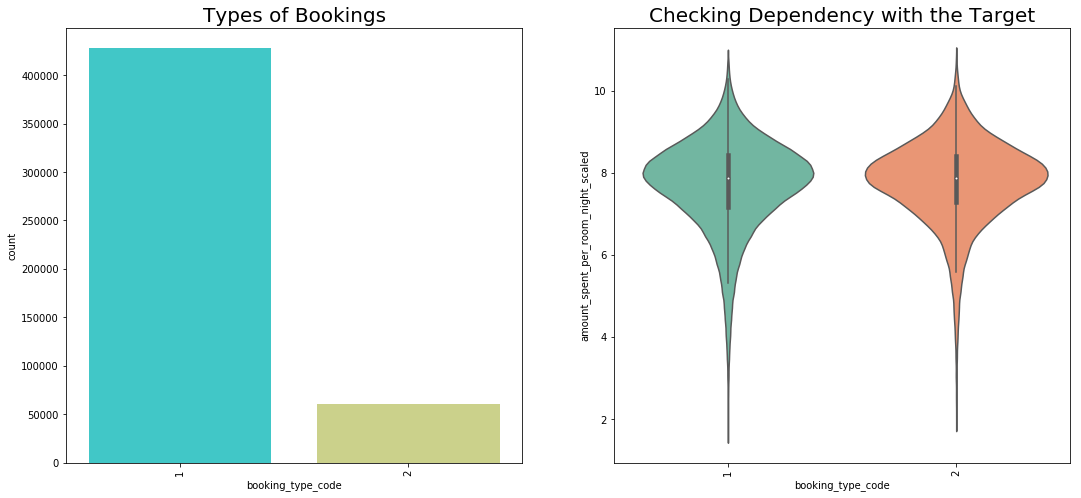

In [44]:
# analysis of booking type code

# counting the values of types of bookings of people travelling
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['booking_type_code'], palette = 'rainbow')
plt.title('Types of Bookings', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.violinplot(train['booking_type_code'], y_train, palette = 'Set2')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

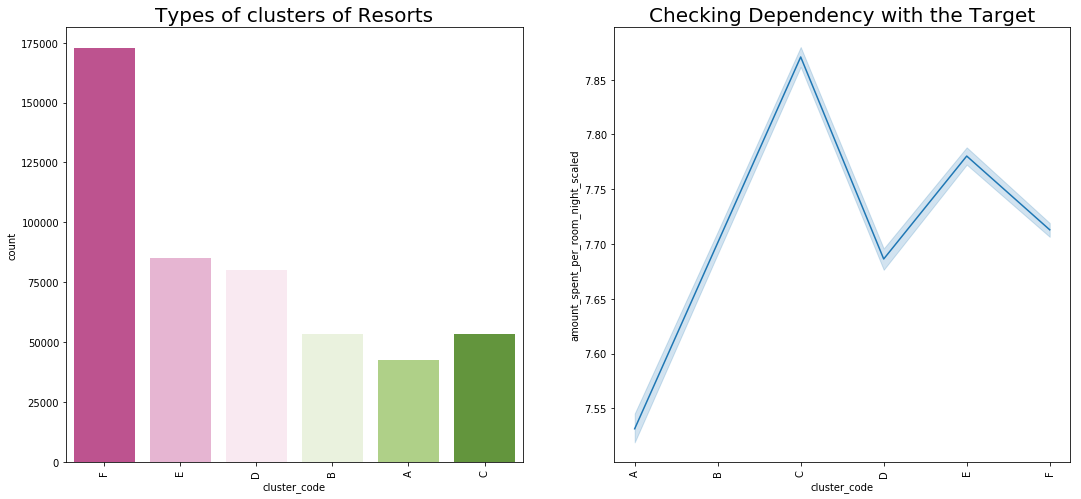

In [45]:
# analysis of cluster code

# counting the values of types of bookings of people travelling
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['cluster_code'], palette = 'PiYG')
plt.title('Types of clusters of Resorts', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['cluster_code'], y_train)#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [46]:
# target encoding for cluster code

data['cluster_code'].replace(('A', 'B', 'C', 'D', 'E', 'F'),(1, 2, 6, 3, 5, 4), inplace = True)

data['cluster_code'].value_counts()

4    172770
5     85361
3     80128
2     53626
6     53604
1     42700
Name: cluster_code, dtype: int64

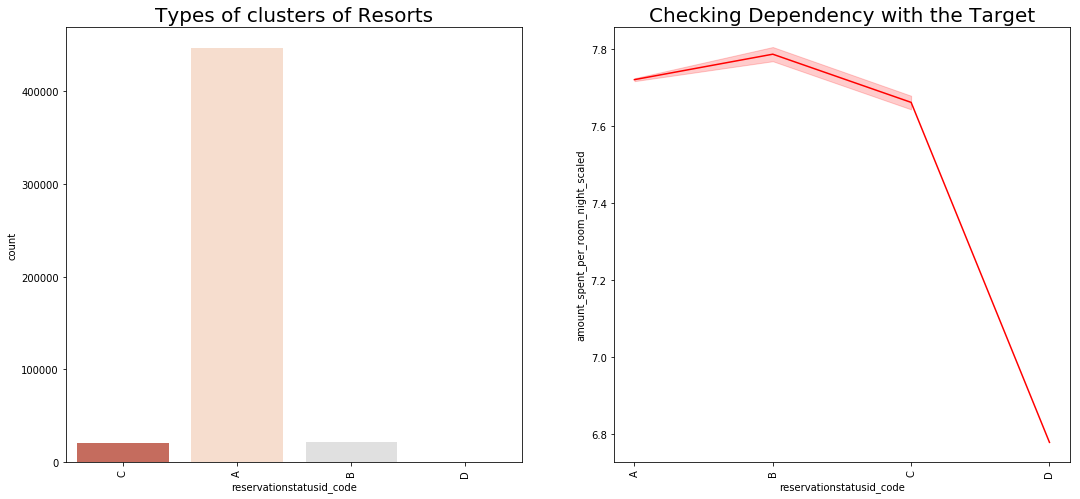

In [47]:
# analysis of res. status

# counting the values of types of reservation status
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['reservationstatusid_code'], palette = 'RdGy')
plt.title('Types of clusters of Resorts', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['reservationstatusid_code'], y_train, color = 'red')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [48]:
# target encoding for reservation code

data['reservationstatusid_code'].replace(('A', 'B', 'C', 'D'), (2.4, 2.5, 2.3, 1), inplace = True)

data['reservationstatusid_code'].value_counts()


2.4    446743
2.5     21240
2.3     20205
1.0         1
Name: reservationstatusid_code, dtype: int64

In [49]:
# feature engineering for training data

# converting the date into datetime format
train['booking_date'] = pd.to_datetime(train['booking_date'], errors = 'coerce')
train['checkin_date'] = pd.to_datetime(train['checkin_date'], errors = 'coerce')
train['checkout_date'] = pd.to_datetime(train['checkout_date'], errors = 'coerce')

train['booking_year'] = train['booking_date'].dt.year
train['booking_month'] = train['booking_date'].dt.month

train['checkin_year'] = train['checkin_date'].dt.year
train['checkin_month'] = train['checkin_date'].dt.month

train['checkout_year'] = train['checkout_date'].dt.year
train['checkout_month'] = train['checkout_date'].dt.month

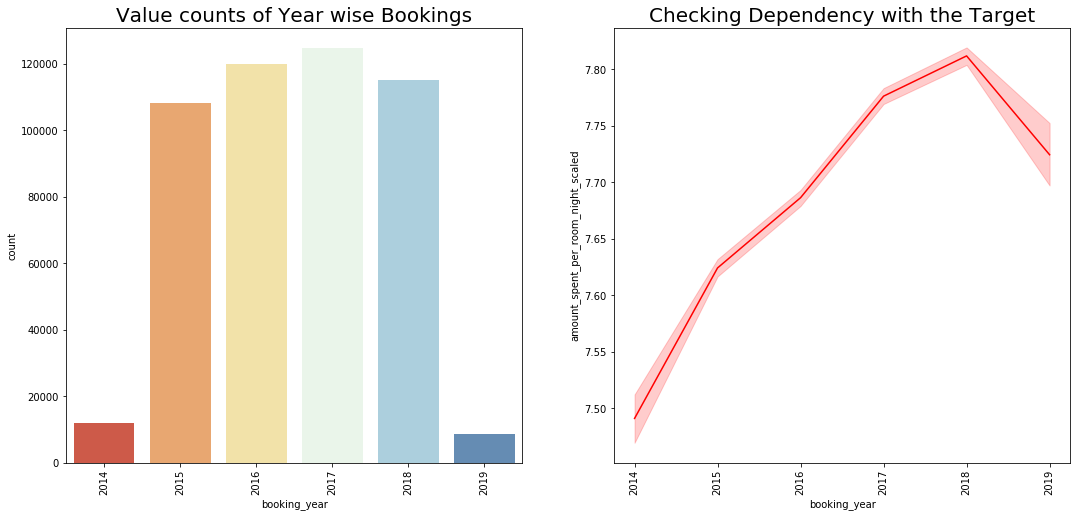

In [50]:
# analysis of booking year

# counting the values of types of reservation status
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['booking_year'], palette = 'RdYlBu')
plt.title('Value counts of Year wise Bookings', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['booking_year'], y_train, color = 'red')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [51]:
# target encoding for the booking year

data['booking_year'].replace((2014, 2015, 2016, 2017, 2018, 2019), (1, 2, 3, 4, 5, 6), inplace = True)

data['booking_year'].value_counts()

4    124644
3    119783
5    115195
2    108082
1     12036
6      8449
Name: booking_year, dtype: int64

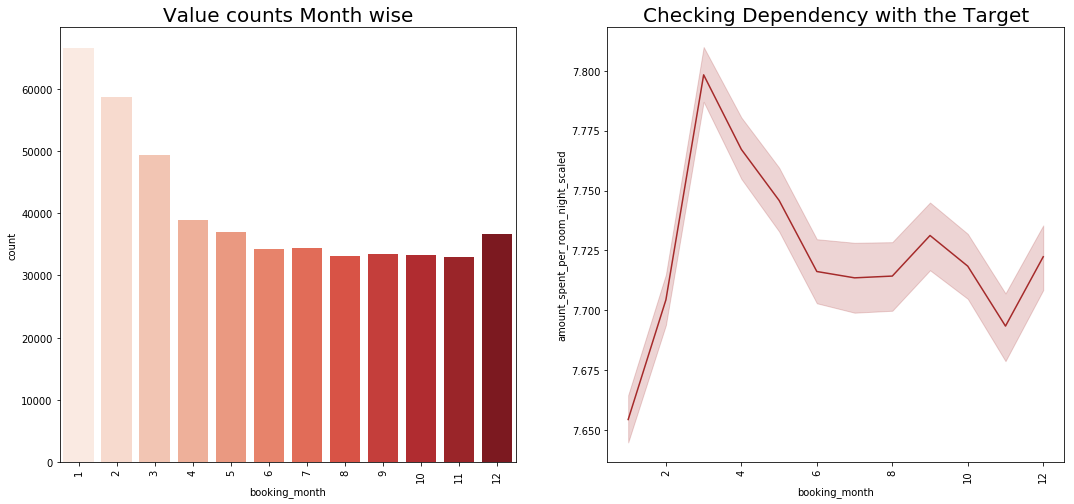

In [52]:
# analysis of booking month

# counting the values of monthly wise
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['booking_month'], palette = 'Reds')
plt.title('Value counts Month wise', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['booking_month'], y_train, color = 'brown')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [53]:
# target encoding for booking month
# i have made some groups according to the graph
# most busy month -march, april, then september and may, then december, october, august, june, july, and at last february, november and January

data['booking_month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (1, 1, 4, 4, 3, 2, 2, 2, 3, 2, 1, 2), inplace = True)

data['booking_month'].value_counts()

2    171560
1    158066
4     88201
3     70362
Name: booking_month, dtype: int64

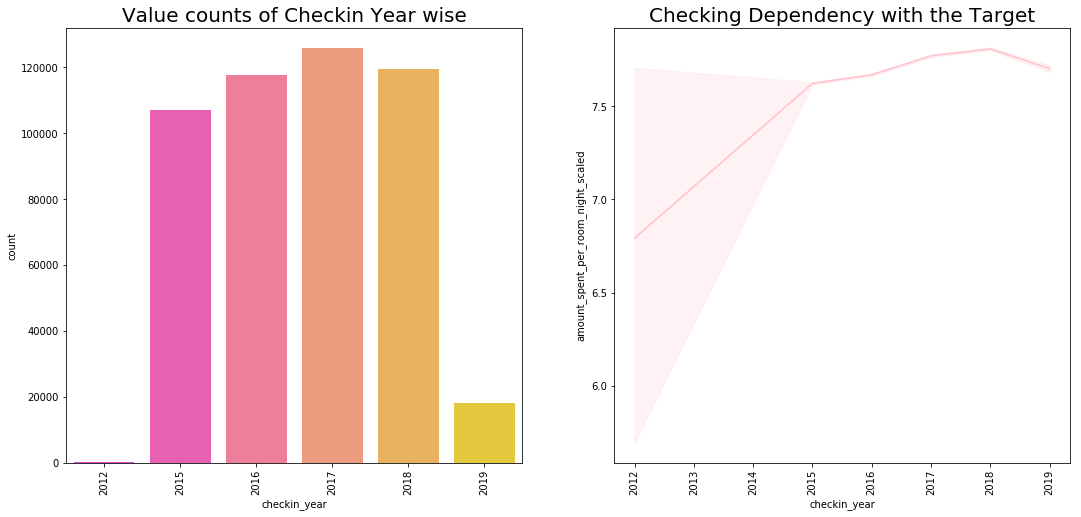

In [54]:
# analysis of checkin year

# counting the values of yearly wise
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['checkin_year'], palette = 'spring')
plt.title('Value counts of Checkin Year wise', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['checkin_year'], y_train, color = 'pink')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [55]:
# target encoding for the checkin year

data['checkin_year'].replace((2012, 2014, 2015, 2016, 2017, 2018, 2019), (1, 2, 3, 4, 5, 6, 6), inplace = True)

data['checkin_year'].value_counts()

6    137468
5    125762
4    117802
3    107143
1        14
Name: checkin_year, dtype: int64

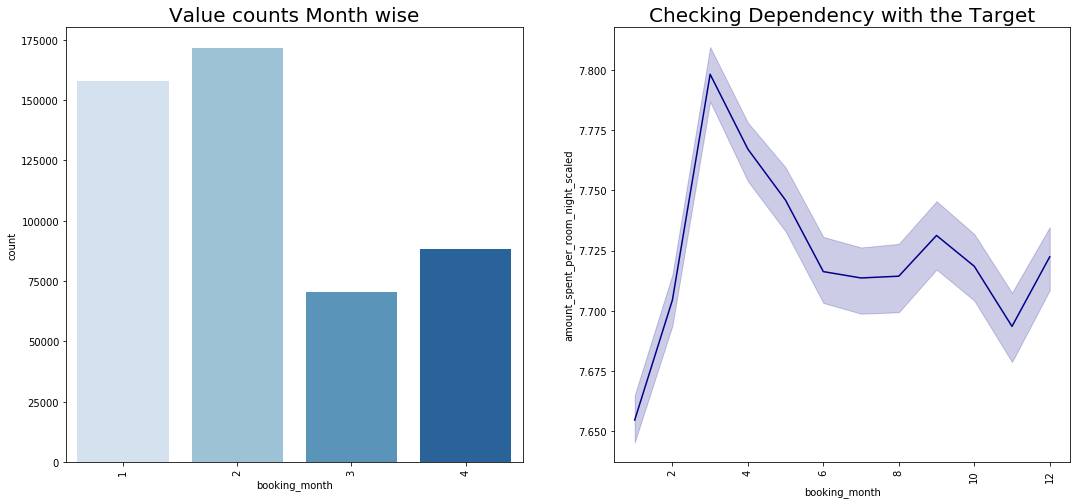

In [56]:
# analysis of checkin month

# counting the values of monthly wise
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['booking_month'], palette = 'Blues')
plt.title('Value counts Month wise', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['booking_month'], y_train, color = 'darkblue')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [57]:
# target encoding for checkin month
# I have made some groups according to the graph
# most busy month -march, april, then september and may, then december, october, august, june, july, and at last february, november and January

data['checkin_month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (1, 1, 4, 4, 3, 2, 2, 2, 3, 2, 1, 2), inplace = True)

data['checkin_month'].value_counts()

2    198203
1    126028
4     82386
3     81572
Name: checkin_month, dtype: int64

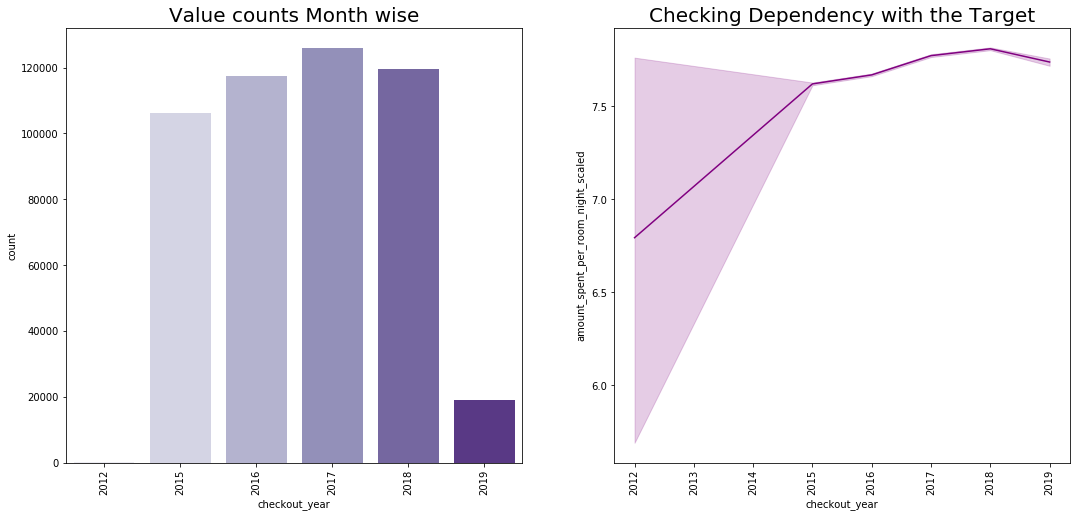

In [58]:
# analysis of checkout year

# counting the values of monthly wise
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['checkout_year'], palette = 'Purples')
plt.title('Value counts Month wise', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['checkout_year'], y_train, color = 'purple')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [59]:
# target encoding for the checkout year

data['checkout_year'].replace((2012, 2014, 2015, 2016, 2017, 2018, 2019), (1, 2, 3, 4, 5, 6, 6), inplace = True)

data['checkout_year'].value_counts()

6    138512
5    125860
4    117598
3    106205
1        14
Name: checkout_year, dtype: int64

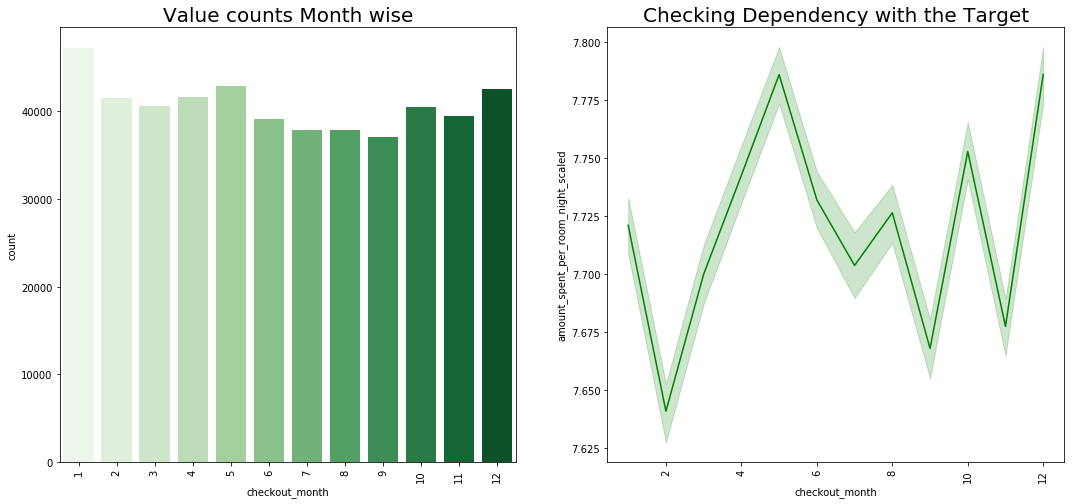

In [60]:
# analysis of checkout month

# counting the values of monthly wise
plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 1)
sns.countplot(data['checkout_month'], palette = 'Greens')
plt.title('Value counts Month wise', fontsize = 20)
plt.xticks(rotation = 90)

# checking dependency with the target variable
plt.subplot(1, 2, 2)
sns.lineplot(train['checkout_month'], y_train, color = 'green')#, palette = 'PRGn')
plt.title('Checking Dependency with the Target', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

In [61]:
# target encoding for checkin month
# I have made some groups according to the graph
# let's encode 12, 5 as 3
# let's encode 6, 4, 8, 10, 1 as 2 and,
# let's encode 2, 7, 3, 11, 9 with 1

data['checkout_month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (2, 1, 1, 2, 3, 3, 1, 2, 1, 2, 1, 3), inplace = True)

data['checkout_month'].value_counts()

1    196520
2    167120
3    124549
Name: checkout_month, dtype: int64

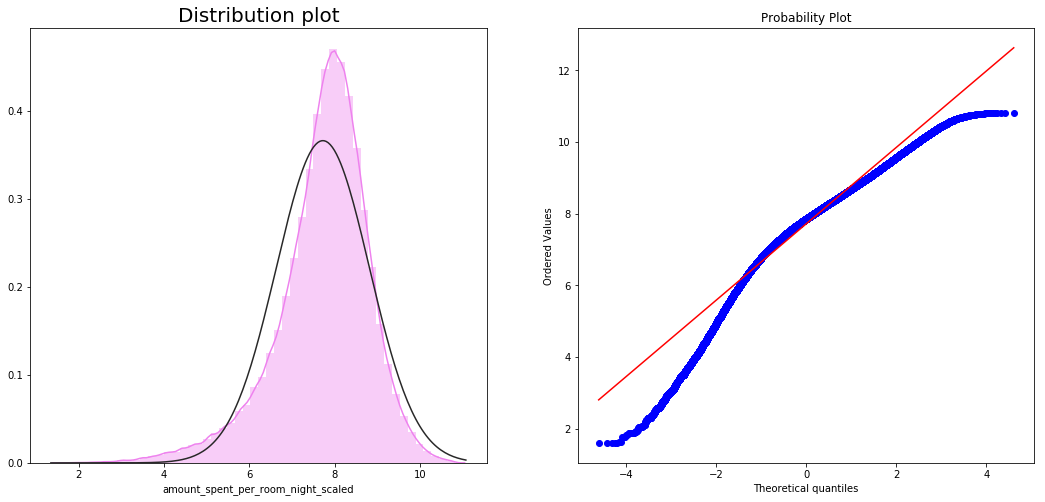

In [62]:
# let's check the distribution of y_train, the target variable

from scipy import stats
from scipy.stats import norm

plt.subplot(1, 2, 1)
sns.distplot(y_train, color = 'violet', fit = norm)
plt.title('Distribution plot', fontsize = 20)

plt.subplot(1, 2, 2)
stats.probplot(y_train, plot = plt)
plt.show()

In [63]:
# splitting the data into train and test

x_train = data.iloc[:341424,:]
x_test = data.iloc[341424:,:]

# getting the shapes
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (341424, 33)
Shape of test : (146765, 33)


In [64]:
# splitting into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (256068, 33)
Shape of x_valid : (85356, 33)
Shape of y_train : (256068,)
Shape of y_valid : (85356,)


In [65]:
# applying standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/arya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/home/arya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [66]:
# finding the skewed features

from scipy.stats import skew

# getting the numerical features
numerical_features = data.dtypes[data.dtypes != 'object'].index

# extracting the skewed features
skewed_features = data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the feautures into a dataframe
skewness = pd.DataFrame({'skew': skewed_features})

# let's check the skewess in the data
skewness.head(10)

,skew
room_type_booked_code_6,193.778224
persontravellingid_4995,127.553780
numberofchildren,29.544612
persontravellingid_4753,15.743949
room_type_booked_code_5,14.517152
numberofadults,12.844693
room_type_booked_code_1,7.801058
persontravellingid_4752,5.418306
total_pax,4.916633
persontravellingid_46,2.864788


In [67]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]
print("There are {} skewed features to box-cox transform".format(skewness.shape[0]))

# importing box-cox
from scipy.special import boxcox1p

skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)
  
data[skewed_features] = np.log1p(data[skewed_features])

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


There are 33 skewed features to box-cox transform


In [68]:
# making a lasso model

from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.005, random_state = 0))
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 1.05208697591022


In [69]:
# making an Elastic Net model

from sklearn.linear_model import ElasticNet

enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9, random_state=3))
enet.fit(x_train, y_train)
y_pred = enet.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 1.0519753120071185


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# making a gradint boosting model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 1.0455928393512994


In [71]:
# light gradient boosting
import lightgbm as lgb

lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 1.043845639493985


In [72]:
# STACKING
# Simplest model -> Averaging Base Models

from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

In [73]:
averaged_models = AveragingModels(models = (enet, gbr, lasso))
averaged_models.fit(x_train, y_train)
y_pred = averaged_models.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

RMSE : 1.0490387631458515


In [74]:
# XG BOOST
import xgboost as xgb

xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

/usr/local/lib/python3.5/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE : 1.0456871114352868


In [75]:
# predicting for the test data

xgb_pred = xgb.predict(x_test)
lgb_pred = lgb.predict(x_test)
stacked_pred = averaged_models.predict(x_test)

In [76]:
# boosting the predictions

predictions = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [77]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not

submission = pd.DataFrame({'reservation_id': reservation_id ,'amount_spent_per_room_night_scaled': predictions})

#Visualize the first 5 rows
submission.head()

,amount_spent_per_room_night_scaled,reservation_id
0,7.747335,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...
1,7.591181,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...
2,7.734831,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...
3,7.837175,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...
4,7.839949,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...


In [78]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
